In [106]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import linregress
import glob
import os #Imports operating system api

path = r'C:\Users\percuoco\Desktop\IODPDataMining_USEME\SRM_new' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    if ("SRM" in filename and not("SRMD" in filename)):
            df = pd.read_csv(filename, index_col=None, header=0, error_bad_lines = False, low_memory=False)    
            li.append(df)
            
dataFrame = pd.concat(li, axis=0, ignore_index=True)
dataFrame.head(10)

,Exp,Site,Hole,Core,Type,Sect,A.W,Offset..cm.,Depth.CSF.A..m.,Depth.CSF.B..m.,...,Instrument,Text.ID,Test.No.,Comments,matched_litho_prefix,matched_litho_principal,matched_litho_suffix,longitude_DD,latitude_DD,water_depth_m
0,362,U1480,A,1,H,1,A,0.0,0.000,0.000,...,SRM,SHLF7851761,99542811,NaN,NaN,ash/tuff,NaN,91.605802,3.0341,4147.53
1,362,U1480,A,1,H,1,A,2.5,0.025,0.025,...,SRM,SHLF7851761,99542811,NaN,NaN,ash/tuff,NaN,91.605802,3.0341,4147.53
2,362,U1480,A,1,H,1,A,5.0,0.050,0.050,...,SRM,SHLF7851761,99542811,NaN,NaN,ash/tuff,NaN,91.605802,3.0341,4147.53
3,362,U1480,A,1,H,1,A,7.5,0.075,0.075,...,SRM,SHLF7851761,99542811,NaN,NaN,clay,NaN,91.605802,3.0341,4147.53
4,362,U1480,A,1,H,1,A,10.0,0.100,0.100,...,SRM,SHLF7851761,99542811,NaN,NaN,clay,NaN,91.605802,3.0341,4147.53
5,362,U1480,A,1,H,1,A,12.5,0.125,0.125,...,SRM,SHLF7851761,99542811,NaN,NaN,clay,NaN,91.605802,3.0341,4147.53
6,362,U1480,A,1,H,1,A,15.0,0.150,0.150,...,SRM,SHLF7851761,99542811,NaN,NaN,clay,NaN,91.605802,3.0341,4147.53
7,362,U1480,A,1,H,1,A,17.5,0.175,0.175,...,SRM,SHLF7851761,99542811,NaN,NaN,clay,NaN,91.605802,3.0341,4147.53
8,362,U1480,A,1,H,1,A,20.0,0.200,0.200,...,SRM,SHLF7851761,99542811,NaN,NaN,clay,NaN,91.605802,3.0341,4147.53
9,362,U1480,A,1,H,1,A,22.5,0.225,0.225,...,SRM,SHLF7851761,99542811,NaN,NaN,clay,NaN,91.605802,3.0341,4147.53


In [107]:
#Drops the NA and NaN values from the selected columns

columns_to_search = [
#'Exp',
#'Site',
#'Hole',
#'Core',
#'Type',
#'#Sect',
#'A.W',
'Offset..cm.',
'Depth.CSF.A..m.',
'Depth.CSF.B..m.',
'Treatment.Type',
'Treatment.Value',
'Inclination.background...drift.corrected..deg.',
'Declination.background...drift.corrected..deg.',
'Intensity.background...drift.corrected..A.m.',
'Inclination.raw..deg.',
'Declination.raw..deg.',
'Intensity.raw..A.m.',
'Magnetic.moment.x..Am..',
'Magnetic.moment.y..Am..',
'Magnetic.moment.z..Am..',
'Sample.orientation',
#'Raw.data',
#'Timestamp..UTC.',
#'Instrument',
'Text.ID',
'Test.No.',
#'Comments',
#'matched_litho_prefix',
#'matched_litho_principal',
#'matched_litho_suffix',
#'longitude_DD',
#'latitude_DD',
#'water_depth_m'
]
dataFrame.dropna(subset=columns_to_search)

,Exp,Site,Hole,Core,Type,Sect,A.W,Offset..cm.,Depth.CSF.A..m.,Depth.CSF.B..m.,...,Instrument,Text.ID,Test.No.,Comments,matched_litho_prefix,matched_litho_principal,matched_litho_suffix,longitude_DD,latitude_DD,water_depth_m
0,362,U1480,A,1,H,1,A,0.0,0.0,0.0,...,SRM,SHLF7851761,99542811,NaN,NaN,ash/tuff,NaN,91.605802,3.034100,4147.53
63,362,U1480,A,1,H,1,A,0.0,0.0,0.0,...,SRM,SHLF7851761,99542821,NaN,NaN,ash/tuff,NaN,91.605802,3.034100,4147.53
126,362,U1480,A,1,H,1,A,0.0,0.0,0.0,...,SRM,SHLF7851761,99542841,NaN,NaN,ash/tuff,NaN,91.605802,3.034100,4147.53
189,362,U1480,A,1,H,1,A,0.0,0.0,0.0,...,SRM,SHLF7851761,99542851,NaN,NaN,ash/tuff,NaN,91.605802,3.034100,4147.53
252,362,U1480,A,1,H,1,A,0.0,0.0,0.0,...,SRM,SHLF7851761,99542861,NaN,NaN,ash/tuff,NaN,91.605802,3.034100,4147.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652313,376,U1531,C,2,R,1,A,0.0,15.0,15.0,...,SRM,SHLF9672041,112446941,NaN,plagioclase-pyroxene phyric,dacite,lava,179.070967,-34.045383,1306.87
1652346,376,U1531,C,2,R,1,A,0.0,15.0,15.0,...,SRM,SHLF9672041,112446891,NaN,plagioclase-pyroxene phyric,dacite,lava,179.070967,-34.045383,1306.87
1652368,376,U1531,C,2,R,1,A,0.0,15.0,15.0,...,SRM,SHLF9672041,112446901,NaN,plagioclase-pyroxene phyric,dacite,lava,179.070967,-34.045383,1306.87
1652390,376,U1531,C,2,R,1,A,0.0,15.0,15.0,...,SRM,SHLF9672041,112446911,NaN,plagioclase-pyroxene phyric,dacite,lava,179.070967,-34.045383,1306.87


In [108]:
#Running into the issue where I cannot change datatypes otherwise the read_csv operation fails:
#I narrowed it down to values of '1.1380E 0', and '1.9441E 0' in the 'Intensity.raw..A.m.' column
#So I am dropping those here

# Get names of indexes where the raw intensities have errors:
#values_to_drop = ["1.1380E 0","1.9441E 0", "NA", "NaN"]

#indexNames = dataFrame[dataFrame[columns_to_search].isin(values_to_drop)].index
#print(indexNames)
#dataFrame.drop(indexNames)


In [109]:
#Convert the datatypes where I can:
dataFrame.astype({
'Exp': str,
'Site': str,
'Hole': str,
'Core': str,
'Type': str,
'Sect': str,
'A.W': str,
'Offset..cm.': np.float64,
'Depth.CSF.A..m.': np.float64,
'Depth.CSF.B..m.': np.float64,
'Treatment.Type': str,
'Treatment.Value': int,
'Inclination.background...drift.corrected..deg.': np.float64,
'Declination.background...drift.corrected..deg.': np.float64,
'Intensity.background...drift.corrected..A.m.': np.float64,
'Inclination.raw..deg.': np.float64,
'Declination.raw..deg.': np.float64,
'Intensity.raw..A.m.': np.float64,
'Magnetic.moment.x..Am..': np.float64,
'Magnetic.moment.y..Am..': np.float64,
'Magnetic.moment.z..Am..': np.float64,
'Sample.orientation': str,
'Raw.data': str,
'Timestamp..UTC.': str,
'Instrument': str,
'Text.ID': str,
'Test.No.': str,
'Comments': str,
'matched_litho_prefix': str,
'matched_litho_principal': str,
'matched_litho_suffix': str,
'longitude_DD': np.float64,
'latitude_DD': np.float64,
'water_depth_m': np.float64}).dtypes                      

Exp                                                object
Site                                               object
Hole                                               object
Core                                               object
Type                                               object
Sect                                               object
A.W                                                object
Offset..cm.                                       float64
Depth.CSF.A..m.                                   float64
Depth.CSF.B..m.                                   float64
Treatment.Type                                     object
Treatment.Value                                     int32
Inclination.background...drift.corrected..deg.    float64
Declination.background...drift.corrected..deg.    float64
Intensity.background...drift.corrected..A.m.      float64
Inclination.raw..deg.                             float64
Declination.raw..deg.                             float64
Intensity.raw.

In [110]:
#Show information about the dataframe and datatypes for final verification

#dataFrame.info()
#dataFrame.dtypes

In [111]:
unique_lithos = dataFrame['matched_litho_principal']
lithos = unique_lithos.unique()

# **Below is a listbox for filtering the histograms by principal lithology**

In [112]:
#This is one method for generating in interactive widget. The output widget depends on the parameter datatype
#I'm passing a list of strings, so it autogenerates a list dropdown
#The selected value can be accessed with q.result

from ipywidgets import widgets, interactive
from IPython.display import display

def ident(lithology):
    return lithology

q = interactive(ident, lithology=lithos)
#display(q) #To display the widget


In [113]:
#This is another method for generating in interactive widget. The output widget depends on the parameter datatype
#I'm passing a list of strings, so it autogenerates a listdropdown
#The selected value can be accessed with s.value
s = widgets.Dropdown(options=lithos)
display(s)

Dropdown(options=('ash/tuff', 'clay', 'fine sand', 'medium sand', 'silty clay', 'alternating sand/mud layers',…

'basalt'

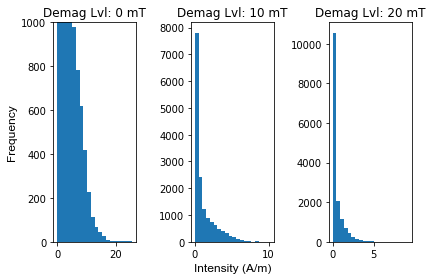

In [138]:
#After changing the widget make sure to SHFT+ENT to rerun this cell

x = dataFrame[dataFrame['matched_litho_principal'] == s.value]
a = x[x['Treatment.Value']==0] 
a= a['Intensity.background...drift.corrected..A.m.'];

b = x[x['Treatment.Value']==10] 
b= b['Intensity.background...drift.corrected..A.m.'];

c = x[x['Treatment.Value']==20] 
c= c['Intensity.background...drift.corrected..A.m.'];

n_bins_intensity = 20
n_bins = 20

fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(a, bins=n_bins_intensity)
axs[0].set(ylim=(0, 1000))
axs[1].hist(b, bins=n_bins_intensity)
axs[2].hist(c, bins=n_bins_intensity);

axs[1].set_xlabel('Intensity (A/m)', fontname='Arial', fontsize=12)
axs[0].set_ylabel('Frequency', fontname='Arial', fontsize=12);

axs[0].set_title('Demag Lvl: 0 mT')
axs[1].set_title('Demag Lvl: 10 mT')
axs[2].set_title('Demag Lvl: 20 mT')

s.value

In [10]:
def highlighter(myvalue):
    if isinstance(myvalue, float):
        return 'color: {0}'.format('green' if myvalue <= 10 else 'black')
    return 'color: black'

In [11]:
x = dataFrame.head(10)
x.columns[7]
x.style.applymap(highlighter, subset=x.columns[14])


,Exp,Site,Hole,Core,Type,Sect,A.W,Offset..cm.,Depth.CSF.A..m.,Depth.CSF.B..m.,Treatment.Type,Treatment.Value,Inclination.background...drift.corrected..deg.,Declination.background...drift.corrected..deg.,Intensity.background...drift.corrected..A.m.,Inclination.raw..deg.,Declination.raw..deg.,Intensity.raw..A.m.,Magnetic.moment.x..Am..,Magnetic.moment.y..Am..,Magnetic.moment.z..Am..,Sample.orientation,Raw.data,Timestamp..UTC.,Instrument,Text.ID,Test.No.,Comments,matched_litho_prefix,matched_litho_principal,matched_litho_suffix,longitude_DD,latitude_DD,water_depth_m
0,363,U1483,A,1,H,1,A,0.000000,0.000000,0.000000,NRM,0,2.600000,156.000000,0.012098,2.600000,156.100000,0.012105,-0.000001,0.000001,0.000000,SECTION HALF : ARCHIVE,36993341.000000,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
1,363,U1483,A,1,H,1,A,2.500000,0.025000,0.025000,NRM,0,11.800000,147.800000,0.008958,11.800000,147.900000,0.008966,-0.000001,0.000001,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
2,363,U1483,A,1,H,1,A,5.000000,0.050000,0.050000,NRM,0,27.700000,135.900000,0.004322,27.600000,136.000000,0.004327,-0.000000,0.000000,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
3,363,U1483,A,1,H,1,A,7.500000,0.075000,0.075000,NRM,0,48.500000,165.000000,0.001881,48.200000,165.200000,0.001887,-0.000000,0.000000,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
4,363,U1483,A,1,H,1,A,10.000000,0.100000,0.100000,NRM,0,21.300000,216.700000,0.001848,21.200000,216.400000,0.001856,-0.000000,-0.000000,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
5,363,U1483,A,1,H,1,A,12.500000,0.125000,0.125000,NRM,0,-3.700000,149.300000,0.004959,-3.800000,149.400000,0.004971,-0.000000,0.000000,-0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
6,363,U1483,A,1,H,1,A,15.000000,0.150000,0.149000,NRM,0,-1.200000,135.300000,0.011327,-1.200000,135.400000,0.011337,-0.000001,0.000001,-0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
7,363,U1483,A,1,H,1,A,17.500000,0.175000,0.174000,NRM,0,8.100000,134.900000,0.013618,8.100000,135.000000,0.013628,-0.000001,0.000001,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,clay-rich,nannofossil ooze,nan,121.804000,-13.087300,1732.930000
8,363,U1483,A,1,H,1,A,20.000000,0.200000,0.199000,NRM,0,18.200000,145.000000,0.012398,18.200000,145.100000,0.012409,-0.000001,0.000001,0.000001,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,clay-rich,nannofossil ooze,nan,121.804000,-13.087300,1732.930000
9,363,U1483,A,1,H,1,A,22.500000,0.225000,0.224000,NRM,0,23.200000,153.000000,0.011615,23.200000,153.100000,0.011627,-0.000001,0.000001,0.000001,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,clay-rich,nannofossil ooze,nan,121.804000,-13.087300,1732.930000


In [12]:
x = dataFrame.head(10)
x.style.applymap(highlighter, subset=x.columns[14])


,Exp,Site,Hole,Core,Type,Sect,A.W,Offset..cm.,Depth.CSF.A..m.,Depth.CSF.B..m.,Treatment.Type,Treatment.Value,Inclination.background...drift.corrected..deg.,Declination.background...drift.corrected..deg.,Intensity.background...drift.corrected..A.m.,Inclination.raw..deg.,Declination.raw..deg.,Intensity.raw..A.m.,Magnetic.moment.x..Am..,Magnetic.moment.y..Am..,Magnetic.moment.z..Am..,Sample.orientation,Raw.data,Timestamp..UTC.,Instrument,Text.ID,Test.No.,Comments,matched_litho_prefix,matched_litho_principal,matched_litho_suffix,longitude_DD,latitude_DD,water_depth_m
0,363,U1483,A,1,H,1,A,0.000000,0.000000,0.000000,NRM,0,2.600000,156.000000,0.012098,2.600000,156.100000,0.012105,-0.000001,0.000001,0.000000,SECTION HALF : ARCHIVE,36993341.000000,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
1,363,U1483,A,1,H,1,A,2.500000,0.025000,0.025000,NRM,0,11.800000,147.800000,0.008958,11.800000,147.900000,0.008966,-0.000001,0.000001,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
2,363,U1483,A,1,H,1,A,5.000000,0.050000,0.050000,NRM,0,27.700000,135.900000,0.004322,27.600000,136.000000,0.004327,-0.000000,0.000000,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
3,363,U1483,A,1,H,1,A,7.500000,0.075000,0.075000,NRM,0,48.500000,165.000000,0.001881,48.200000,165.200000,0.001887,-0.000000,0.000000,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
4,363,U1483,A,1,H,1,A,10.000000,0.100000,0.100000,NRM,0,21.300000,216.700000,0.001848,21.200000,216.400000,0.001856,-0.000000,-0.000000,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
5,363,U1483,A,1,H,1,A,12.500000,0.125000,0.125000,NRM,0,-3.700000,149.300000,0.004959,-3.800000,149.400000,0.004971,-0.000000,0.000000,-0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
6,363,U1483,A,1,H,1,A,15.000000,0.150000,0.149000,NRM,0,-1.200000,135.300000,0.011327,-1.200000,135.400000,0.011337,-0.000001,0.000001,-0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,nannofossil-rich,clay,nan,121.804000,-13.087300,1732.930000
7,363,U1483,A,1,H,1,A,17.500000,0.175000,0.174000,NRM,0,8.100000,134.900000,0.013618,8.100000,135.000000,0.013628,-0.000001,0.000001,0.000000,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,clay-rich,nannofossil ooze,nan,121.804000,-13.087300,1732.930000
8,363,U1483,A,1,H,1,A,20.000000,0.200000,0.199000,NRM,0,18.200000,145.000000,0.012398,18.200000,145.100000,0.012409,-0.000001,0.000001,0.000001,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,clay-rich,nannofossil ooze,nan,121.804000,-13.087300,1732.930000
9,363,U1483,A,1,H,1,A,22.500000,0.225000,0.224000,NRM,0,23.200000,153.000000,0.011615,23.200000,153.100000,0.011627,-0.000001,0.000001,0.000001,nan,nan,10/26/2016 13:07,SRM,SHLF8106021,101303631,nan,clay-rich,nannofossil ooze,nan,121.804000,-13.087300,1732.930000


In [13]:
%lsmagic -gui?


Docstring:
Enable or disable IPython GUI event loop integration.

%gui [GUINAME]

This magic replaces IPython's threaded shells that were activated
using the (pylab/wthread/etc.) command line flags.  GUI toolkits
can now be enabled at runtime and keyboard
interrupts should work without any problems.  The following toolkits
are supported:  wxPython, PyQt4, PyGTK, Tk and Cocoa (OSX)::

    %gui wx      # enable wxPython event loop integration
    %gui qt4|qt  # enable PyQt4 event loop integration
    %gui qt5     # enable PyQt5 event loop integration
    %gui gtk     # enable PyGTK event loop integration
    %gui gtk3    # enable Gtk3 event loop integration
    %gui tk      # enable Tk event loop integration
    %gui osx     # enable Cocoa event loop integration
                 # (requires %matplotlib 1.1)
    %gui         # disable all event loop integration

an application object, but DO NOT start the event loop yourself, as
we have already handled that.
File:      c:\users\percuoco\a

In [ ]:
%lsmagic -gui

%lsmagic **-gui**

## Holy crap you can even add latex in this badboy!
$e^{i\pi} + 1 = 0$